# This notebook presents several ideas of a technical approach to conducting stock price analysis.

## Imports and setup
FYI: I find 'Yahoo Finance' (yfinance) a bit better than pandas-datareader.

In [405]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')

In [406]:
start = datetime(2019, 1, 1)
end = datetime.today()

Let's select a few NYSE tickers in the form of a dictionary, which will be loaded into yfinance. In this notebook I'm going to focus on banks. It is a completely subjective and random choice.

In [407]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
df = yf.download(tickers, start, end, group_by='ticker')
df.tail()

[*********************100%%**********************]  6 of 6 completed


Ticker            BAC                                                        \
Price            Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2024-05-06  37.660000  37.790001  37.360001  37.689999  37.689999  28422300   
2024-05-07  37.700001  38.150002  37.700001  37.840000  37.840000  29119500   
2024-05-08  37.700001  37.820000  37.520000  37.709999  37.709999  32803300   
2024-05-09  37.529999  38.419998  37.459999  38.279999  38.279999  26855400   
2024-05-10  38.480000  38.779999  38.330002  38.450001  38.450001  27345000   

Ticker              GS                                      ...        WFC  \
Price             Open        High         Low       Close  ...        Low   
Date                                                        ...              
2024-05-06  441.750000  444.380005  439.679993  443.670013  ...  59.840000   
2024-05-07  445.170013  447.420013  442.869995  443.799988  ...  60.060001   
2024-05-08  442.799988  448.019989  442.049988  446.950012  ...  60.099998   
2024-05-09  446.339996  456.429993  446.339996  455.559998  ...  60.480000   
2024-05-10  456.519989  458.750000  454.320007  454.730011  ...  61.459999   

Ticker                                              C                        \
Price           Close  Adj Close    Volume       Open       High        Low   
Date                                                                          
2024-05-06  60.189999  60.189999  16240100  62.060001  62.939999  61.720001   
2024-05-07  60.259998  60.259998  16268200  62.820000  63.160000  61.970001   
2024-05-08  61.230000  61.230000  18718400  61.639999  62.950001  61.509998   
2024-05-09  61.279999  61.279999  14224300  62.380001  63.430000  62.290001   
2024-05-10  61.889999  61.889999  14423600  63.580002  63.919998  63.119999   

Ticker                                      
Price           Close  Adj Close    Volume  
Date                                        
2024-05-06  62.810001  62.810001  13386700  
2024-05-07  62.000000  62.000000  10158200  
2024-05-08  62.750000  62.750000   9755200  
2024-05-09  63.320000  63.320000  11563000  
2024-05-10  63.529999  63.529999   9547000  

[5 rows x 36 columns]

In [408]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1349 entries, 2019-01-02 to 2024-05-10
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, Open)       1349 non-null   float64
 1   (BAC, High)       1349 non-null   float64
 2   (BAC, Low)        1349 non-null   float64
 3   (BAC, Close)      1349 non-null   float64
 4   (BAC, Adj Close)  1349 non-null   float64
 5   (BAC, Volume)     1349 non-null   int64  
 6   (GS, Open)        1349 non-null   float64
 7   (GS, High)        1349 non-null   float64
 8   (GS, Low)         1349 non-null   float64
 9   (GS, Close)       1349 non-null   float64
 10  (GS, Adj Close)   1349 non-null   float64
 11  (GS, Volume)      1349 non-null   int64  
 12  (MS, Open)        1349 non-null   float64
 13  (MS, High)        1349 non-null   float64
 14  (MS, Low)         1349 non-null   float64
 15  (MS, Close)       1349 non-null   float64
 16  (MS, Adj Close)   1349 n

# Explanatory data analysis

### Dataframe prep.
Let's remove unwanted columns and check the maximum historical price of the selected stocks.

In [409]:
df.xs(key='Close', axis='columns', level='Price').max()

Ticker
BAC     49.380001
GS     455.559998
MS     108.730003
JPM    200.300003
WFC     61.889999
C       81.910004
dtype: float64

Dataframe based on close price.

In [410]:
dfClose = df.xs(key='Close', axis='columns', level='Price')

Let's check the stock price charts on a quick overview chart.

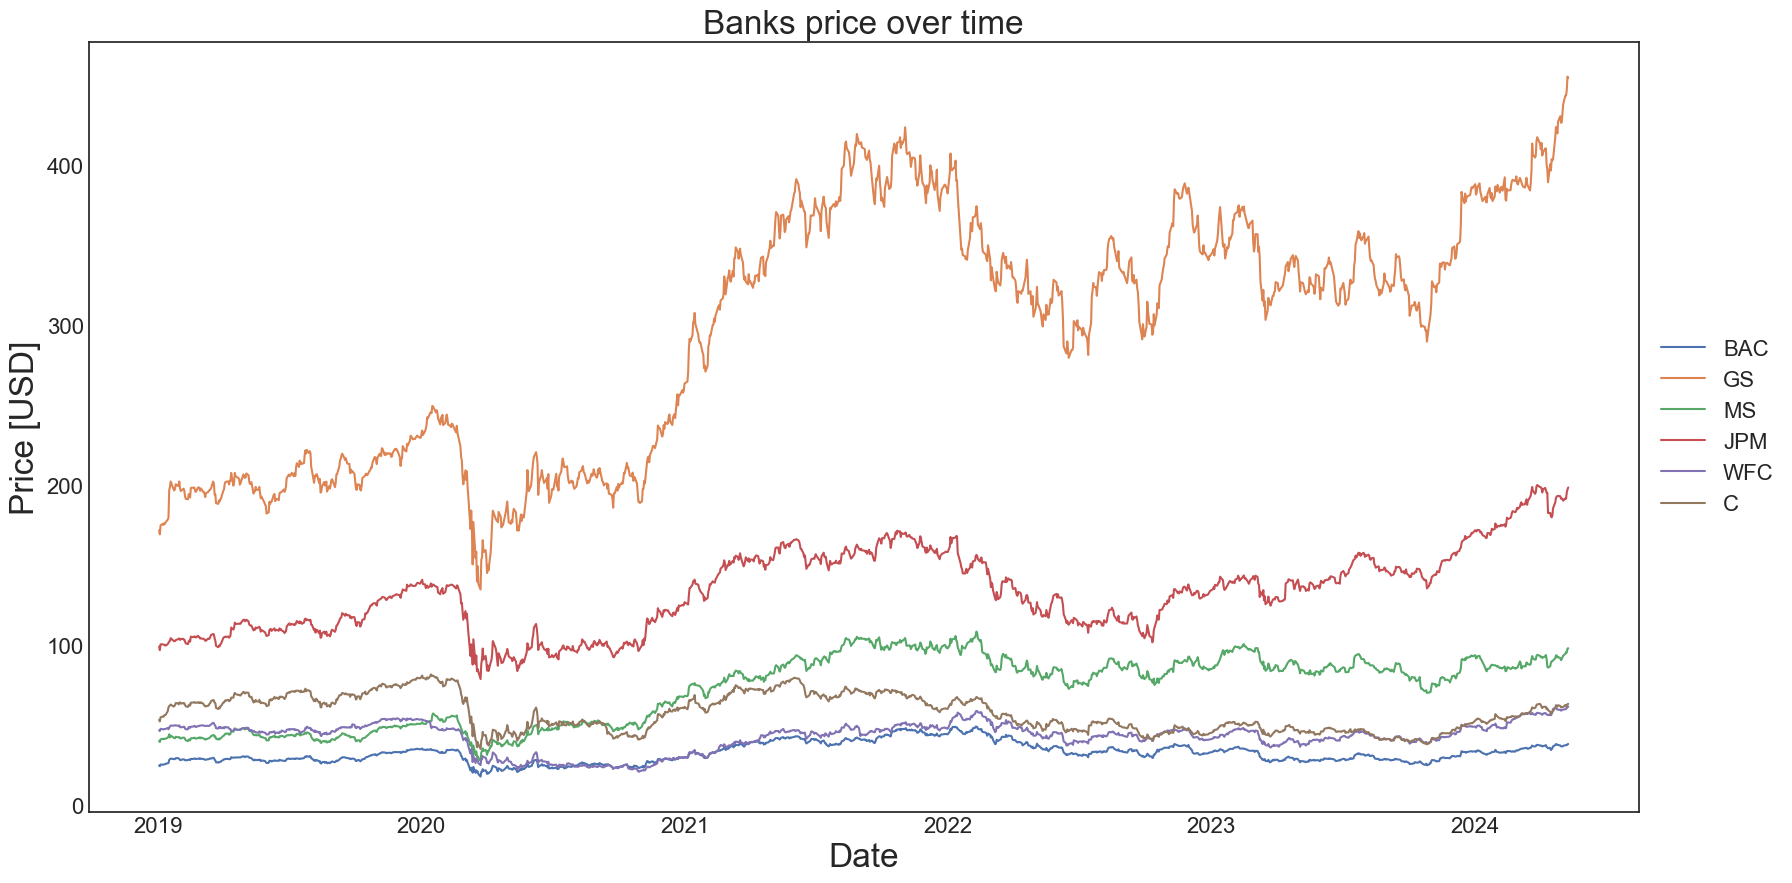

In [411]:
fig, axes = plt.subplots(figsize=(20,10))
axes.plot(dfClose)
axes.set_xlabel('Date', fontsize=24)
axes.set_ylabel('Price [USD]', fontsize=24)
axes.set_title('Banks price over time', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(labels=dfClose.columns, loc='center right', bbox_to_anchor=(1.1, 0.5), fontsize=16)

plt.show()

### Returns dataframe
To design a new dataframe containing return data, let's change the column names for convenience using a simple dictionary.

In [412]:
dfReturns = df.xs(key='Close', axis='columns', level='Price').pct_change()

dfReturnsColNames = {
    'GS': 'GS Return',
    'WFC': 'WFC Return',
    'MS': 'MS Return',
    'C': 'C Return',
    'BAC': 'BAC Return',
    'JPM': 'JPM Return'
}

dfReturns.rename(columns=dfReturnsColNames, inplace=True)

It's obvious that the first return value cannot be calculated, so for aesthetic purposes, let's assign the value = 0.

In [413]:
dfReturns.fillna(0, inplace=True)
dfReturns.iloc[:2]

Ticker,BAC Return,GS Return,MS Return,JPM Return,WFC Return,C Return
Date,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.016026,-0.014649,-0.017822,-0.022153,-0.007882,-0.018121


Let's check, when was the biggest dropdown. Nothing special :).

In [414]:
dfReturns.idxmin()

Ticker
BAC Return   2020-03-16
GS Return    2020-03-16
MS Return    2020-03-16
JPM Return   2020-03-16
WFC Return   2020-03-12
C Return     2020-03-16
dtype: datetime64[ns]

If we were to consider adding these stocks to our portfolio, then according to the Modern Portfolio Theory by Markowitz, it would be necessary to adjust the amount of stocks in the portfolio due to volatility – in this case, the appropriate measure is the standard deviation. To make a long story short, we should proportionally add fewer of the stocks with the highest standard deviation to the portfolio than those with lower volatility.

In [415]:
dfClose.std()

Ticker
BAC     6.346141
GS     76.794177
MS     21.470878
JPM    25.438439
WFC     8.848163
C      11.289092
dtype: float64

Regardless of local price volatility, the daily dispersion of returns is similar for all positions.

In [416]:
tickerStdDev = dfReturns.std()
tickerStdDev

Ticker
BAC Return    0.022042
GS Return     0.020210
MS Return     0.021793
JPM Return    0.019653
WFC Return    0.023374
C Return      0.023976
dtype: float64

### Having calculated the daily returns, it would be worth considering calculating the VaR - Value at Risk.

**Value at Risk (VaR)** is a statistical measure used to assess the level of risk associated with a portfolio or an investment over a specific time period. It provides an estimate of the potential loss in value of a risky asset or portfolio over a defined period for a given confidence interval. Essentially, VaR answers the question: "What is my potential loss over a certain period at a given confidence level?"

Key Characteristics of VaR:

- **Probability Level**: VaR is calculated for a specific confidence level, typically 95% or 99%.
- **Time Horizon**: The period over which the risk assessment is made, such as one day, one week, or one year.
- **Loss Estimation**: VaR gives a threshold value such that the loss on the portfolio over the given time horizon exceeds this threshold only with a specified probability.

Value at Risk is a widely used risk management tool in finance, but it is crucial to understand its limitations and ensure it is used appropriately within a broader risk management strategy.


In [417]:
from scipy.stats import norm

Text(0, 0.5, 'Count')

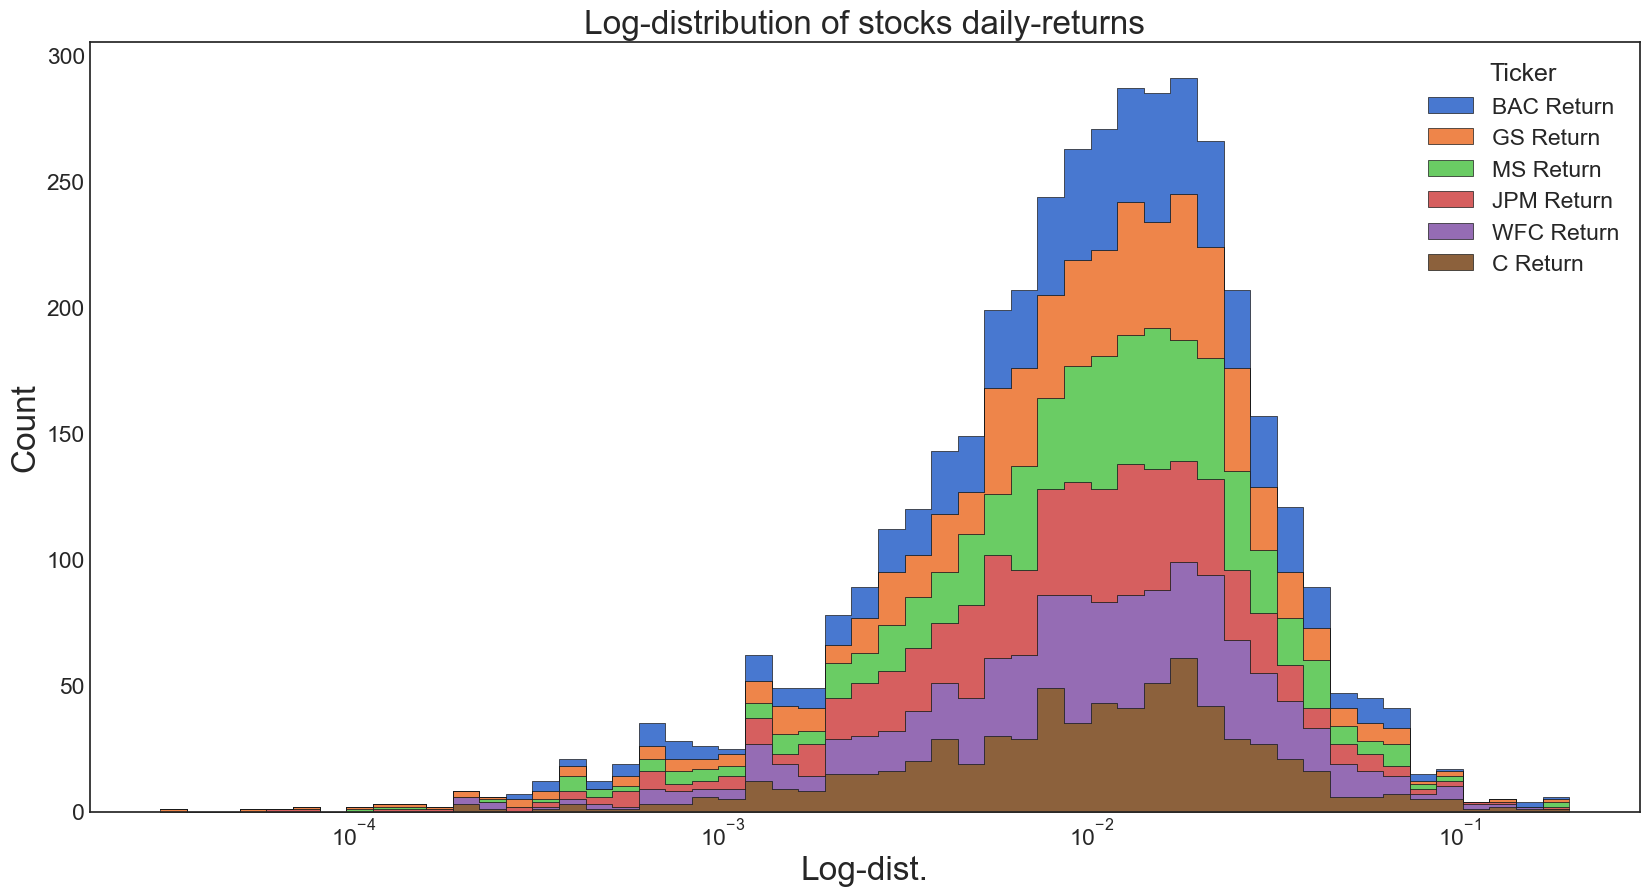

In [418]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(
    dfReturns,
    kde=False,
    alpha=1,
    multiple="stack",
    palette="muted",
    edgecolor=".1",
    linewidth=0.5,
    log_scale=True,
    element="step",
)
plt.title('Log-distribution of stocks daily-returns', fontsize='24')
plt.xlabel('Log-dist.', fontsize='24')
plt.ylabel('Count', fontsize='24')

$$ VaR_{\text{n days}} = VaR_{95} \times \sqrt{\text{n days}} $$

We can calculate VaR in a very simple way using the `norm.ppf` function from the scipy package. To change the time horizon, we multiply by the square root of the number of days in the period of interest. It's almost certain that for shorter periods, the VaR will be more radical.

In [419]:
confidence_level = 0.95

var_results = {}
var_results_30d = {}

for column in dfReturns.columns:
    returns = dfReturns[column]
    var = norm.ppf(1 - confidence_level, returns.mean(), returns.std())
    var_results[column] = round(var * 100, 2)
    var_results_30d[column] = round(var * 100 * np.sqrt(30), 2)

print('Based on the historical returns (2019/01/01 - today) of the portfolio at a 95% confidence interval, the worst loss is a 3.90% loss,\
     \ntherefore the result is negative.')
print(f"VaR historical: {var_results}")
print(f"VaR of 30 days: {var_results_30d}")
    

Based on the historical returns (2019/01/01 - today) of the portfolio at a 95% confidence interval, the worst loss is a 3.90% loss,     
therefore the result is negative.
VaR historical: {'BAC Return': -3.57, 'GS Return': -3.23, 'MS Return': -3.5, 'JPM Return': -3.16, 'WFC Return': -3.8, 'C Return': -3.9}
VaR of 30 days: {'BAC Return': -19.55, 'GS Return': -17.7, 'MS Return': -19.14, 'JPM Return': -17.32, 'WFC Return': -20.8, 'C Return': -21.37}


Let's examine the correlation between individual stocks. It is obvious that within the same sector, stocks must be correlated, but is it evenly so?

For example, a correlation of 0.50 means that 50% of the time, the movement of the stock prices for the compared companies is the same.

In [420]:
corrMatrix = dfClose.corr().round(2)
corrMatrix

Ticker,BAC,GS,MS,JPM,WFC,C
Ticker,,,,,,
BAC,1.00,0.75,0.74,0.70,0.63,0.50
GS,0.75,1.00,0.97,0.87,0.48,0.01
MS,0.74,0.97,1.00,0.78,0.38,-0.07
JPM,0.70,0.87,0.78,1.00,0.60,0.27
WFC,0.63,0.48,0.38,0.60,1.00,0.49
C,0.50,0.01,-0.07,0.27,0.49,1.00


A graphical approach.

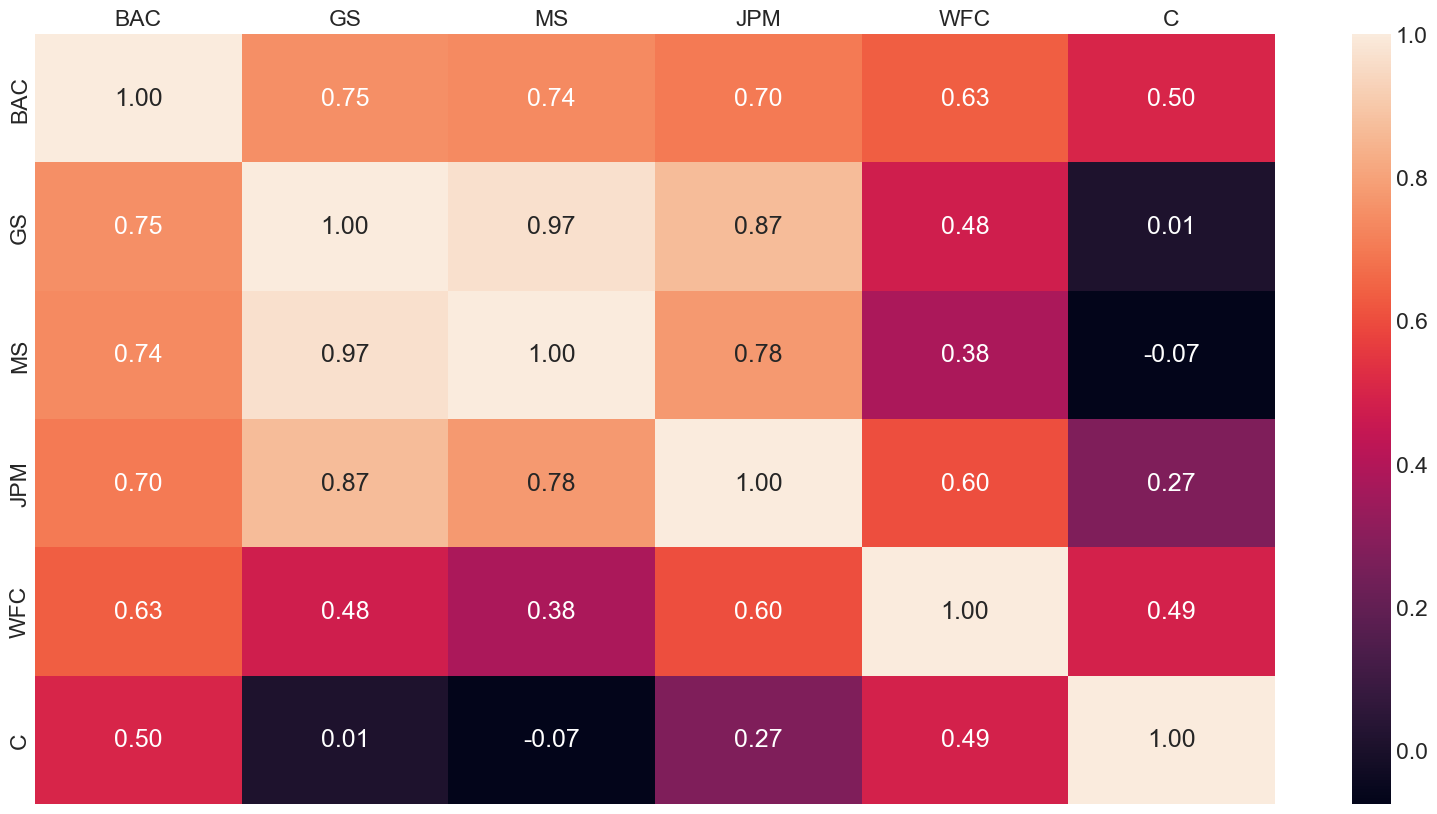

In [421]:
fig, ax = plt.subplots(figsize=(20,10))
ht = sns.heatmap(dfClose.corr(), annot=True, fmt='.2f')
ht.set(xlabel="", ylabel="")
ht.xaxis.tick_top()

The correlation of the type "each with each" looks great but doesn't tell much. It is necessary to introduce a substitute correlation coefficient, calculated as the average correlation of 1 ticker with all others. It can be observed that the ticker "BAC" has the highest correlation with the portfolio, and it should have its weights "trimmed" in the portfolio.

In [422]:
tickerCorr = {}
for column in corrMatrix.columns:
    corrColumn = corrMatrix[column]
    corrMean = corrColumn.mean()
    tickerCorr[column] = corrMean.round(2)

sorted_tickerCorr = sorted(tickerCorr.items(), key=lambda x: x[1]) # second element!
print(tickerCorr)

{'BAC': 0.72, 'GS': 0.68, 'MS': 0.63, 'JPM': 0.7, 'WFC': 0.6, 'C': 0.37}


## Volatility
$$volatility = \sigma_{\text{minPeriods}} \times \sqrt{minPeriods}$$

is an indicator of market risk. The higher it is, the riskier it is to stay in the market.
We can clearly observe a radical jump in volatility during the 2020 pandemic.

Text(0, 0.5, 'Volatility')

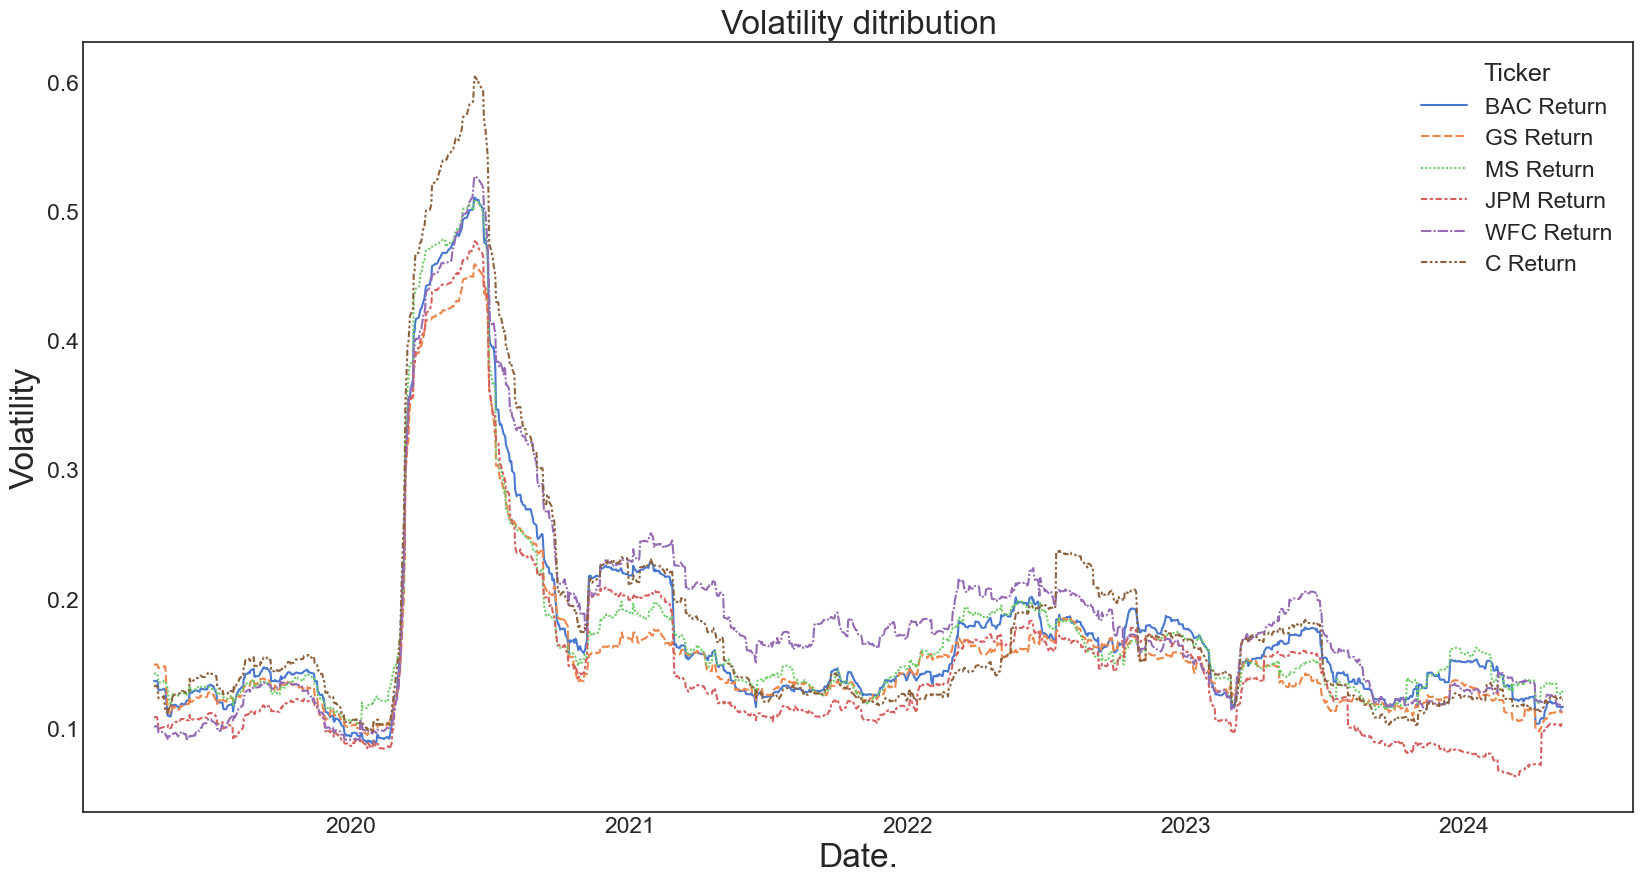

In [439]:
minPeriods = 75

vol = dfReturns.rolling(minPeriods).std() * np.sqrt(minPeriods)

f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(
    vol,
    palette="muted",
)
plt.title('Volatility ditribution', fontsize='24')
plt.xlabel('Date.', fontsize='24')
plt.ylabel('Volatility', fontsize='24')

# Simple moving average analysis

Let's check how the theory of signals generated by two moving averages with different and arbitrarily chosen steps behaves in practice.

First, we need to establish the time steps for the moving averages - the shorter and the longer one - that is, from how many days the moving average will be calculated.

The most popular lengths in long-term trading are 50 and 200.

In [424]:
shortWindow = 50
shortWindowLabel = 'SMA{}'.format(shortWindow)
longWindow = 200
longWindowLabel = 'SMA{}'.format(longWindow)

## Buy/Sell signals - points where short SMA crosses long from bottom-up or up-bottom

In the practical application of two moving averages, we are interested in the signals generated by the crossing of the averages. When the average with the shorter step becomes larger than the longer one, we have a buy signal - the market's cumulative demand is greater than the long-term trend. The opposite situation occurs when the shorter average becomes smaller than the longer one - we receive a sell signal.

Buy = 1, Sell = -1, Hold = 0

In [425]:
dfCloseSMA = dfClose.copy()
dfCloseSMA['Date'] = dfCloseSMA.index

dfCloseSMA['JPMsignalMark'] = 0

dfCloseSMA['smaShort'] = dfCloseSMA['JPM'].rolling(window=shortWindow, min_periods=1).mean()
dfCloseSMA['smaLong'] = dfCloseSMA['JPM'].rolling(window=longWindow, min_periods=1).mean()

# NumPy.where(): if True return 1 or -1; if False return 0
# Find the periods in which the short average is greater than the long one.

dfCloseSMA['JPMsignalMark'] = np.where(dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 1, 0)

# NumPy.diff(): the first difference is given by out[i] = a[i+1] - a[i] along the given axis
# Find a trading signal

dfCloseSMA['JPMsignalMark'] = dfCloseSMA['JPMsignalMark'].diff()


Mark Buy/Sell has been established for variable -1/1 (SMAs crossover point), but it's linked to the actual price, highlighting that this technique generates a delay not only in time but also in price.

First iteration of simple moving analysis technique.

In [426]:
plt.style.use('seaborn-v0_8-white')

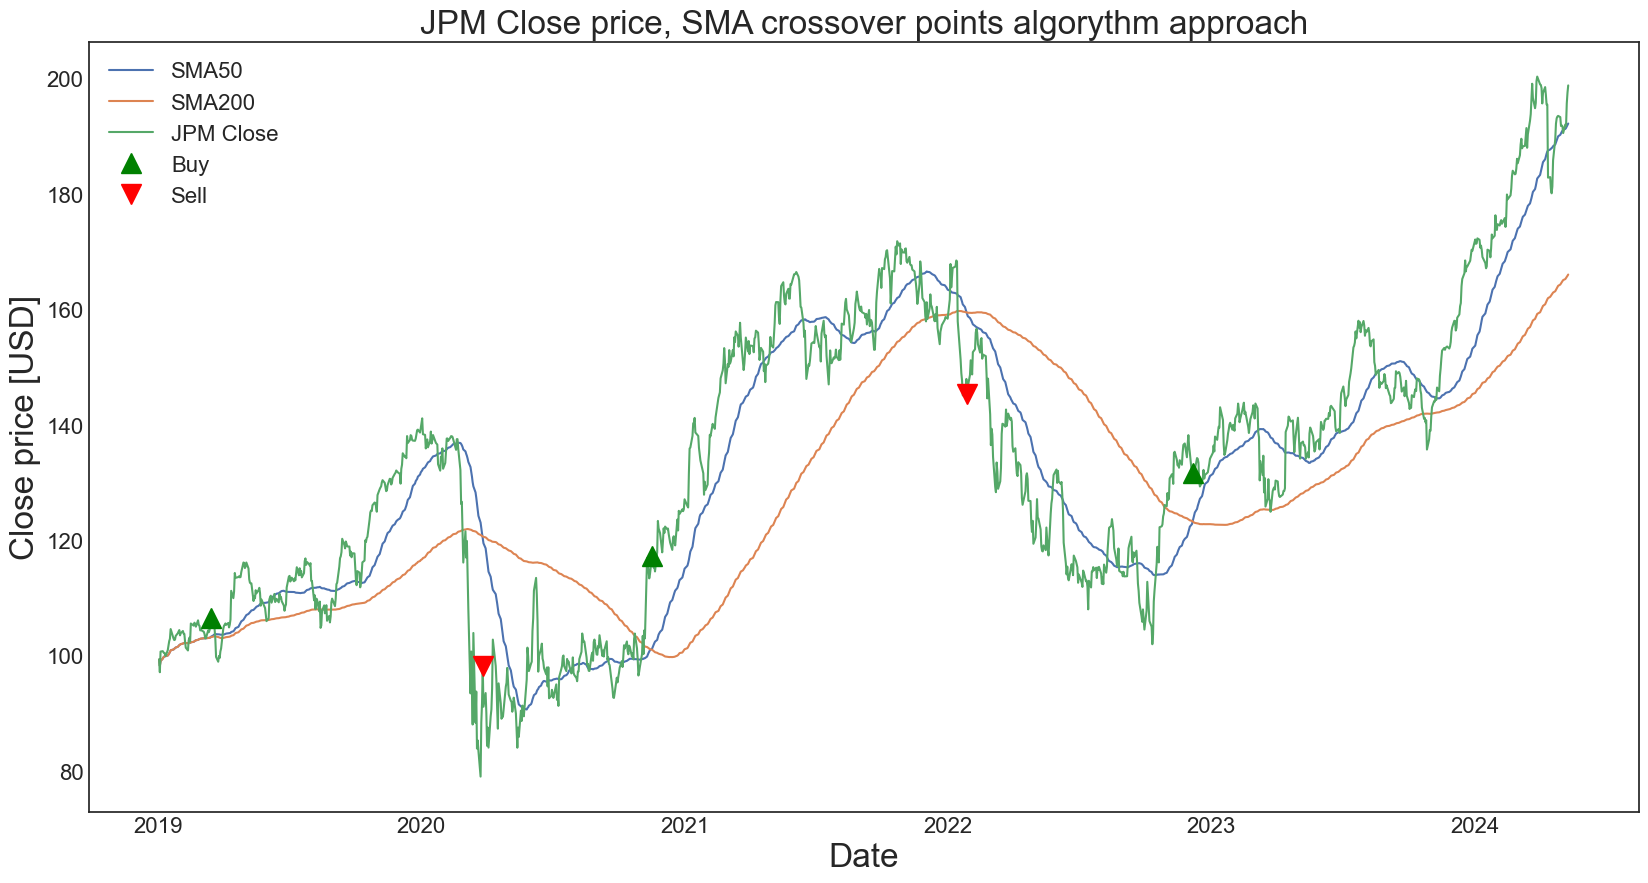

Ticker,BAC,GS,MS,JPM,WFC,C,Date,JPMsignalMark,smaShort,smaLong
Date,,,,,,,,,,
2019-03-15,29.299999,198.259995,43.330002,106.550003,50.660000,65.190002,2019-03-15,1.0,103.269200,103.191569
2020-03-26,22.719999,165.789993,35.709999,98.120003,30.900000,46.020000,2020-03-26,-1.0,120.359200,120.644200
2020-11-16,27.580000,222.380005,58.110001,117.300003,24.900000,50.400002,2020-11-16,1.0,101.206000,101.005950
2022-01-27,45.470001,341.029999,101.150002,145.309998,53.759998,64.150002,2022-01-27,-1.0,159.156801,159.419850
2022-12-06,33.000000,362.910004,87.510002,131.589996,43.400002,44.980000,2022-12-06,1.0,123.259999,123.222800


In [427]:
plt.figure(figsize=(20,10))

plt.plot(dfCloseSMA.index, dfCloseSMA['smaShort'],label=shortWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['smaLong'],label=longWindowLabel)
plt.plot(dfCloseSMA.index, dfCloseSMA['JPM'],label='JPM Close')

plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
plt.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

plt.title('JPM Close price, SMA crossover points algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close price [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='upper left', fontsize='16')
plt.show()

# Transactions list
(dfCloseSMA.loc[(dfCloseSMA['JPMsignalMark'] == 1) | (dfCloseSMA['JPMsignalMark'] == -1)])


## Counting total return from hypothetical investment

In [428]:
initialCapital = 10000 # USD

dfCloseSMA['DailyReturns'] = dfCloseSMA['JPM'].pct_change()
dfCloseSMA['OnMarket'] = 0
dfCloseSMA.loc[dfCloseSMA['smaShort'] > dfCloseSMA['smaLong'], 'OnMarket'] = 1

dfCloseSMA['OnMarketReturns'] = dfCloseSMA['DailyReturns'] * dfCloseSMA['OnMarket'].shift(1) # Transaction is set the day after signal
dfCloseSMA['CumulativeProfit'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * initialCapital
dfCloseSMA['StrategyCumulative'] = (1 + dfCloseSMA['OnMarketReturns']).cumprod() * dfCloseSMA['JPM'].iloc[0]

dfCloseSMA.bfill(inplace=True)


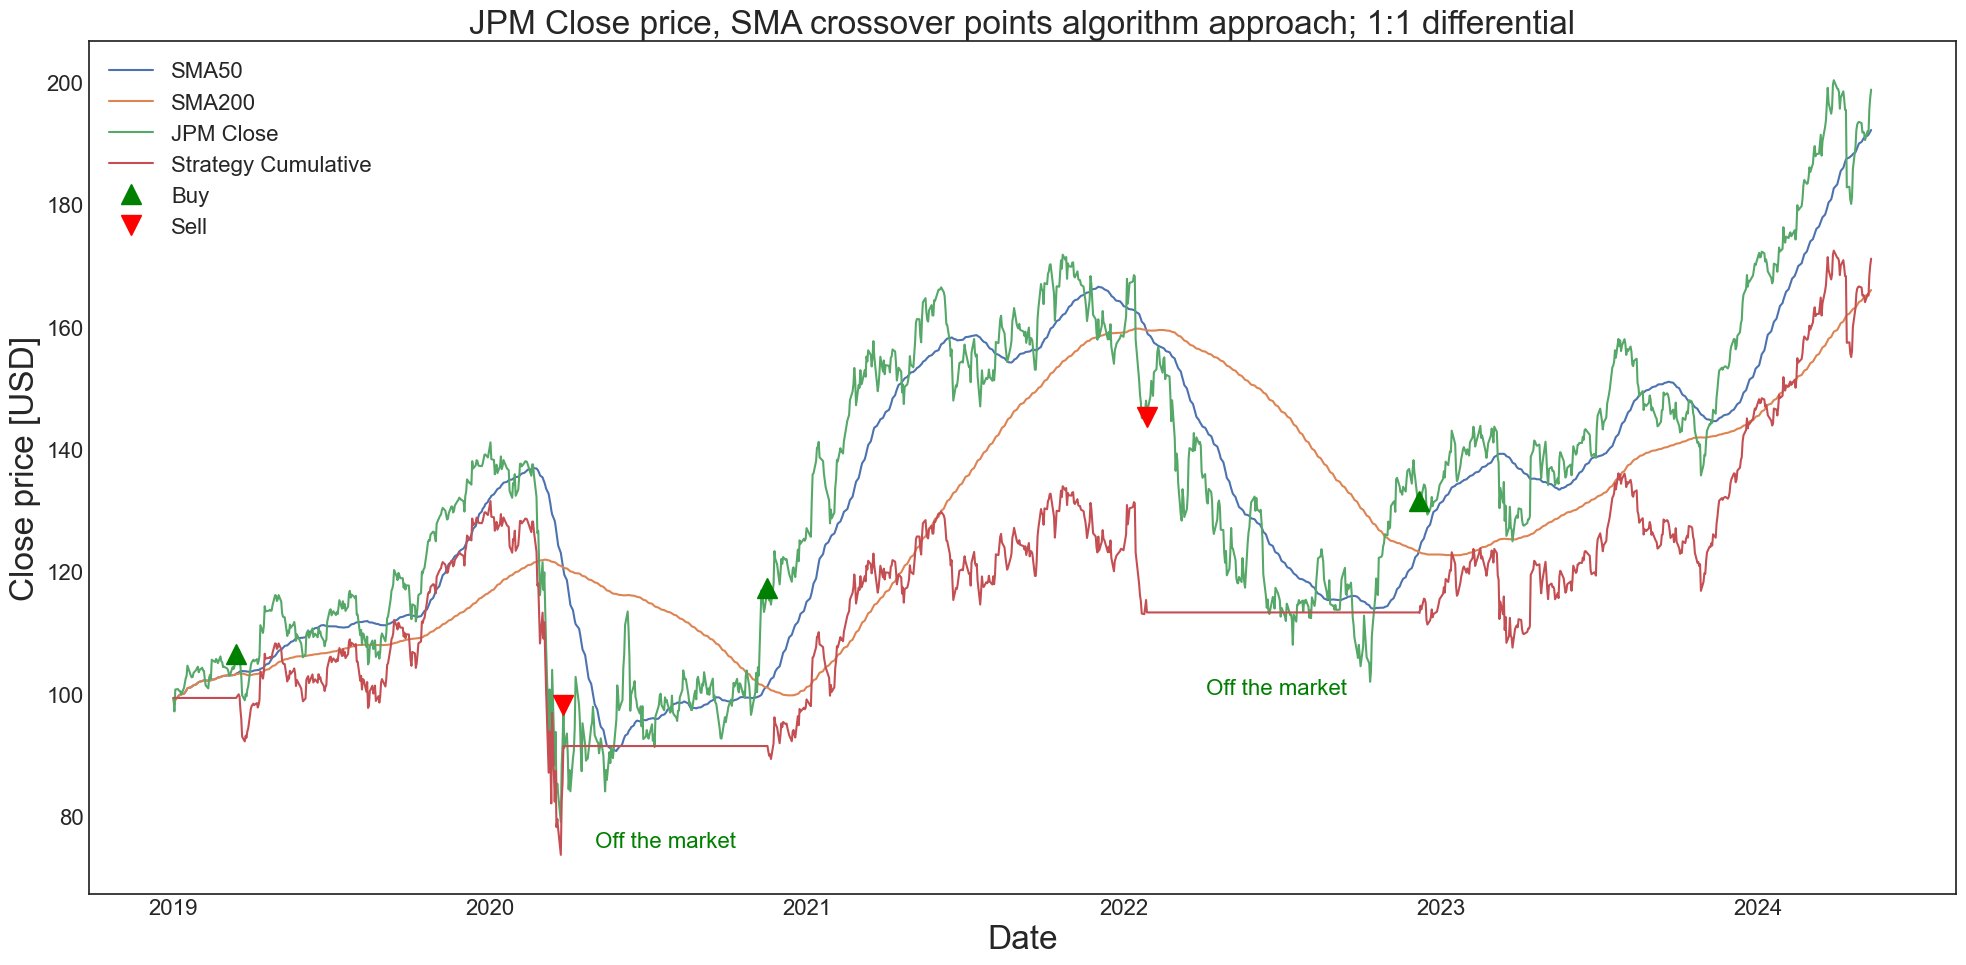

In [429]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')
ax1.plot(dfCloseSMA.index, dfCloseSMA['StrategyCumulative'], label='Strategy Cumulative')

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')

ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 75), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 75),
    fontsize=16, color='green'
)
ax1.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2022-04-05'], 100), 
    xytext=(dfCloseSMA['Date'].loc['2022-04-05'], 100),
    fontsize=16, color='green'
)
plt.title('JPM Close price, SMA crossover points algorithm approach; 1:1 differential', fontsize=24)
plt.tight_layout()
plt.show()

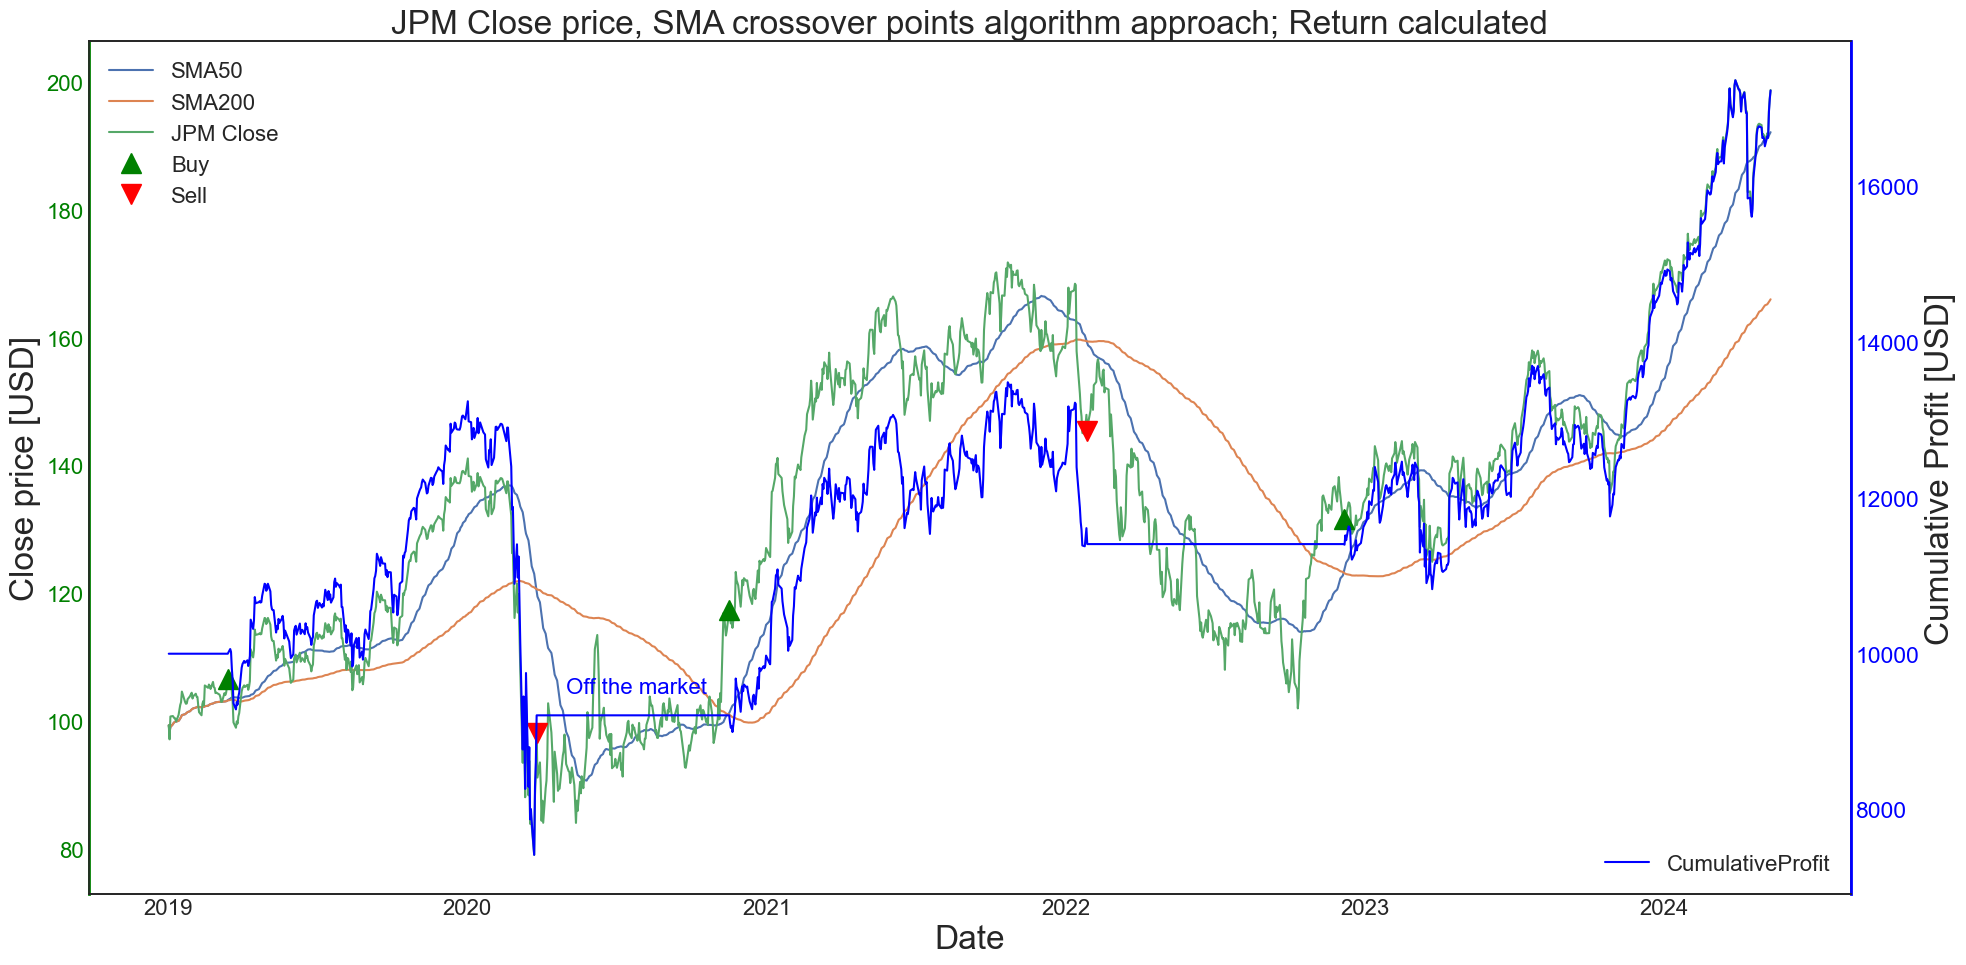

- Strategy pct. return 172.32% vs Buy and hold pct. return 200.15%

- Initial capital was 10000 USD, and cumulative profit amounted to     7231.76 USD; 
which gives a total amount equal         to 17231.76 USD


In [430]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax1 = plt.gca()

ax1.plot(dfCloseSMA.index, dfCloseSMA['smaShort'], label=shortWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['smaLong'], label=longWindowLabel)
ax1.plot(dfCloseSMA.index, dfCloseSMA['JPM'], label='JPM Close')

ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == 1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax1.plot(dfCloseSMA.loc[dfCloseSMA['JPMsignalMark'] == -1].index, dfCloseSMA['JPM'].loc[dfCloseSMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)

ax1.set_xlabel('Date', fontsize=24)
ax1.set_ylabel('Close price [USD]', fontsize=24)
ax1.tick_params(labelsize=16)
ax1.legend(loc='upper left', fontsize='16')
ax1.spines['left'].set_color('green')
ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='y', colors='green', width=2)

ax2 = ax1.twinx()
ax2.plot(dfCloseSMA.index, dfCloseSMA['CumulativeProfit'], label='CumulativeProfit', color='blue')
ax2.set_ylabel('Cumulative Profit [USD]', fontsize=24)
ax2.legend(loc='lower right', fontsize='16')
ax2.spines['right'].set_color('blue')
ax2.spines['right'].set_linewidth(2)
ax2.tick_params(axis='y', colors='blue', width=2)

ax2.annotate(
    'Off the market', 
    xy=(dfCloseSMA['Date'].loc['2020-05-01'], 9500), 
    xytext=(dfCloseSMA['Date'].loc['2020-05-01'], 9500),
    fontsize=16, color='blue'
)

plt.title('JPM Close price, SMA crossover points algorithm approach; Return calculated', fontsize=24)
plt.tight_layout()
plt.show()

buy_and_hold_pct = (dfCloseSMA['JPM'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseSMA['StrategyCumulative'].iloc[-1] / dfCloseSMA['JPM'].iloc[0]) * 100

print(f"- Strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to \
    {round(dfCloseSMA['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal \
        to {round(dfCloseSMA['CumulativeProfit'].iloc[-1], 2)} USD")

# Expotential moving average

The Exponential Moving Average (EMA) is a type of weighted moving average (WMA) that places a greater weight and significance on the most recent data points. It is commonly used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles.

**Application**

EMA is particularly popular in stock market analysis, where it helps traders and analysts track the momentum and potentially identify trends in stock prices. It's also used in economics for forecasting future trends based on historical data.

**Formula**

The formula for the Exponential Moving Average is given by:

$$
EMA_{today} = (\text{Value}_{today} \times K) + (EMA_{yesterday} \times (1 - K))
$$

where:
- $\text{Value}_{today}$ is the price or value at the current time period.
- $EMA_{yesterday}$ is the EMA from the previous period.
- $K$ is the smoothing constant, calculated as $\frac{2}{{N + 1}}$, where $N$ is the number of periods in the EMA.

This formula helps in reducing the lag by applying more weight to recent data, making the EMA quicker to react to price changes compared to the Simple Moving Average (SMA).


In [431]:
dfCloseEMA = dfClose.copy()

In [432]:
dfCloseEMA['JPMsignalMark'] = 0
dfCloseEMA['emaLong'] = dfClose['JPM'].ewm(span=200, adjust=False).mean()

dfCloseEMA['JPMsignalMark'] = np.where(dfCloseEMA['emaLong'] < dfCloseEMA['JPM'], 1, 0)
dfCloseEMA['JPMsignalMark'] = dfCloseEMA['JPMsignalMark'].diff()

initialCapital = 10000 # USD

dfCloseEMA['DailyReturns'] = dfCloseEMA['JPM'].pct_change()
dfCloseEMA['OnMarket'] = 0
dfCloseEMA.loc[dfCloseEMA['emaLong'] < dfCloseEMA['JPM'], 'OnMarket'] = 1

dfCloseEMA['OnMarketReturns'] = dfCloseEMA['DailyReturns'] * dfCloseEMA['OnMarket'].shift(1) # Transaction is set the day after signal
dfCloseEMA['CumulativeProfit'] = (1 + dfCloseEMA['OnMarketReturns']).cumprod() * initialCapital
dfCloseEMA['StrategyCumulative'] = (1 + dfCloseEMA['OnMarketReturns']).cumprod() * dfCloseEMA['JPM'].iloc[0]

dfCloseEMA.bfill(inplace=True)

# Transactions list
(dfCloseEMA.loc[(dfCloseEMA['JPMsignalMark'] == 1) | (dfCloseEMA['JPMsignalMark'] == -1)]).head()

Ticker,BAC,GS,MS,JPM,WFC,C,JPMsignalMark,emaLong,DailyReturns,OnMarket,OnMarketReturns,CumulativeProfit,StrategyCumulative
Date,,,,,,,,,,,,,
2019-01-04,25.580000,175.050003,41.299999,100.690002,47.950001,55.130001,1.0,99.302056,0.036865,1,0.000000,10000.000000,99.309998
2019-03-22,27.010000,188.960007,41.720001,99.760002,48.310001,60.980000,-1.0,101.098736,-0.030232,0,-0.030232,9907.637275,98.392743
2019-03-29,27.590000,191.990005,42.200001,101.230003,48.320000,62.220001,1.0,101.049284,0.005163,1,0.000000,9907.637275,98.392743
2019-08-14,26.420000,195.559998,39.330002,104.800003,43.970001,61.410000,-1.0,107.395342,-0.041522,0,-0.041522,10257.042203,101.862684
2019-08-16,27.030001,199.419998,39.939999,107.720001,44.389999,63.480000,1.0,107.376945,0.023954,1,0.000000,10257.042203,101.862684


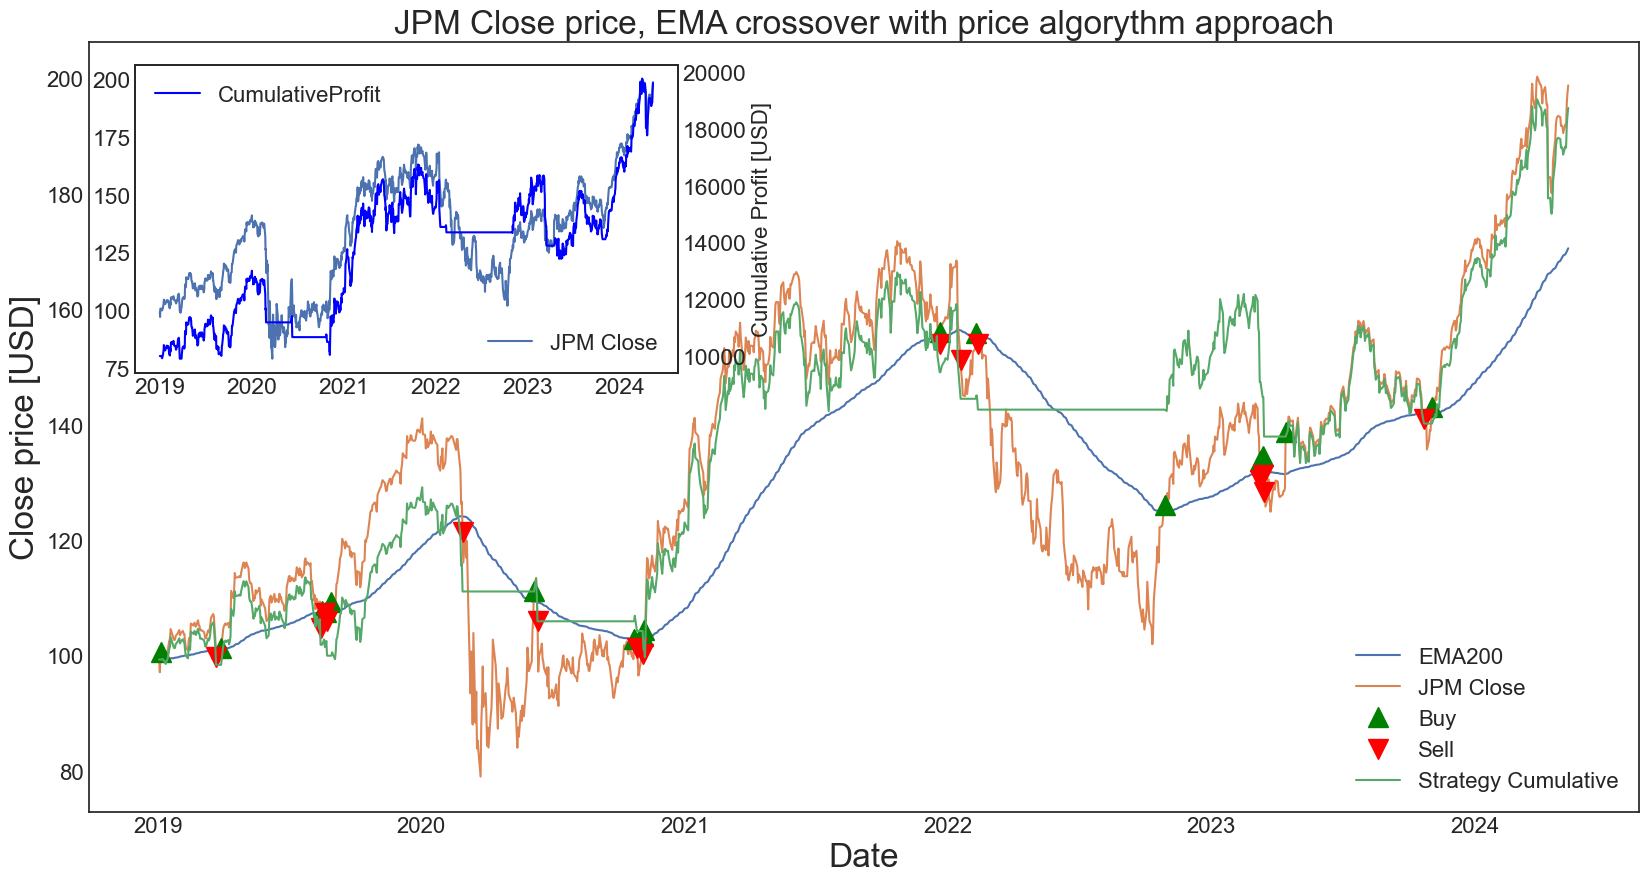

- EMA strategy pct. return 196.22% vs Buy and hold pct. return 200.15%

- Initial capital was 10000 USD, and cumulative profit amounted to     9621.69 USD; 
which gives a total amount equal         to 19621.69 USD


In [433]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dfCloseEMA.index, dfCloseEMA['emaLong'],label='EMA200')
ax.plot(dfCloseEMA.index, dfCloseEMA['JPM'],label='JPM Close')
ax.plot(dfCloseEMA.loc[dfCloseEMA['JPMsignalMark'] == 1].index, dfCloseEMA['JPM'].loc[dfCloseEMA['JPMsignalMark'] == 1], '^', color='green', markersize=15, label='Buy', lw=6)
ax.plot(dfCloseEMA.loc[dfCloseEMA['JPMsignalMark'] == -1].index, dfCloseEMA['JPM'].loc[dfCloseEMA['JPMsignalMark'] == -1], 'v', color='red', markersize=15, label='Sell', lw=6)
ax.plot(dfCloseEMA.index, dfCloseEMA['StrategyCumulative'], label='Strategy Cumulative')

plt.title('JPM Close price, EMA crossover with price algorythm approach', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close price [USD]', fontsize=24)
plt.tick_params(labelsize=16)
plt.legend(loc='lower right', fontsize='16')

inset_ax = ax.inset_axes([0.030, 0.570, 0.350, 0.400])
inset_ax.plot(dfCloseEMA.index, dfCloseEMA['JPM'],label='JPM Close')
inset_ax2 = inset_ax.twinx()
inset_ax2.plot(dfCloseEMA.index, dfCloseEMA['CumulativeProfit'], label='CumulativeProfit', color='blue')
inset_ax2.set_ylabel('Cumulative Profit [USD]', fontsize=16)
inset_ax.legend(loc='lower right', fontsize='16')
inset_ax2.legend(loc='upper left', fontsize='16')

plt.show()

buy_and_hold_pct = (dfCloseEMA['JPM'].iloc[-1] / dfCloseEMA['JPM'].iloc[0]) * 100
strategy_pct = (dfCloseEMA['StrategyCumulative'].iloc[-1] / dfCloseEMA['JPM'].iloc[0]) * 100

print(f"- EMA strategy pct. return {round(strategy_pct, 2)}% vs Buy and hold pct. return {round(buy_and_hold_pct, 2)}%")
print()
print(f"- Initial capital was {initialCapital} USD, and cumulative profit amounted to \
    {round(dfCloseEMA['CumulativeProfit'].iloc[-1] - initialCapital, 2)} USD; \nwhich gives a total amount equal \
        to {round(dfCloseEMA['CumulativeProfit'].iloc[-1], 2)} USD")

# Expotential MA vs Simple MA

As we can observe, there is a significant difference between the SMA (Simple Moving Average) and EMA (Exponential Moving Average) approaches. In this specific case, EMA performs better because it weights current data more heavily, and we used only one average intersecting with the stock price chart. This results in significantly more frequent transactions. However, the number of transactions over the years covered in the analysis does not outweigh the result, as transaction costs are currently exceptionally low. Nonetheless, the frequency of transactions can be mentally exhausting for some traders, especially beginners. Using two SMAs, on the other hand, appears to be very conservative. However, it is important to note that this has its cost, namely a delayed signal generates larger "losses" in percentage terms during downturns. There are also noticeably fewer signals, which can be motivating. The choice of approach is highly subjective. It must be noted that the approach presented is actually the final stage of selecting and trading these stocks, because the use of short-term signal strategies makes sense only when dealing with strong upward momentum, which only occurs with good companies and a suitable market environment.